In [1]:
!pip install rasterio
!pip install pillow

     |████████████████████████████████| 18.2MB 19.3MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
cd drive/'Shared drives'/'Checking Shared Drive'/sep_insat/

/content/drive/Shared drives/Checking Shared Drive/sep_insat


In [ ]:
ls

3DIMG_01SEP2019_0000_L1C_ASIA_MER_IMG_MIR.tif
3DIMG_01SEP2019_0000_L1C_ASIA_MER_IMG_SWIR.tif
3DIMG_01SEP2019_0000_L1C_ASIA_MER_IMG_TIR1.tif
3DIMG_01SEP2019_0000_L1C_ASIA_MER_IMG_TIR2.tif
3DIMG_01SEP2019_0000_L1C_ASIA_MER_IMG_VIS.tif
3DIMG_01SEP2019_0000_L1C_ASIA_MER_IMG_WV.tif
3DIMG_01SEP2019_0030_L1C_ASIA_MER_IMG_MIR.tif
3DIMG_01SEP2019_0030_L1C_ASIA_MER_IMG_SWIR.tif
3DIMG_01SEP2019_0030_L1C_ASIA_MER_IMG_TIR1.tif
3DIMG_01SEP2019_0030_L1C_ASIA_MER_IMG_TIR2.tif
3DIMG_01SEP2019_0030_L1C_ASIA_MER_IMG_VIS.tif
3DIMG_01SEP2019_0030_L1C_ASIA_MER_IMG_WV.tif
3DIMG_01SEP2019_0100_L1C_ASIA_MER_IMG_MIR.tif
3DIMG_01SEP2019_0100_L1C_ASIA_MER_IMG_SWIR.tif
3DIMG_01SEP2019_0100_L1C_ASIA_MER_IMG_TIR1.tif
3DIMG_01SEP2019_0100_L1C_ASIA_MER_IMG_TIR2.tif
3DIMG_01SEP2019_0100_L1C_ASIA_MER_IMG_VIS.tif
3DIMG_01SEP2019_0100_L1C_ASIA_MER_IMG_WV.tif
3DIMG_01SEP2019_0130_L1C_ASIA_MER_IMG_MIR.tif
3DIMG_01SEP2019_0130_L1C_ASIA_MER_IMG_SWIR.tif
3DIMG_01SEP2019_0130_L1C_ASIA_MER_IMG_TIR1.tif
3DIMG_01SEP2019_0130_L1C_A

### Import the image : rasterio & pillow

In [4]:
import numpy as np

import rasterio
from PIL import Image
#import tifffile  #incase Pillow doesnot work due to 8 bit limitations.

import matplotlib.pyplot as plt

In [105]:
image_files = []
#img_path = "sample sat photos\\"
channels = ['MIR','SWIR','TIR1','TIR2','VIS','WV']
for chan in channels:
  image_files.append("3DIMG_01SEP2019_1400_L1C_ASIA_MER_IMG_"+chan+".tif")

In [163]:
img_files

['3DIMG_01SEP2019_0930_L1C_ASIA_MER_IMG_MIR.tif',
 '3DIMG_01SEP2019_0930_L1C_ASIA_MER_IMG_SWIR.tif',
 '3DIMG_01SEP2019_0930_L1C_ASIA_MER_IMG_TIR1.tif',
 '3DIMG_01SEP2019_0930_L1C_ASIA_MER_IMG_TIR2.tif',
 '3DIMG_01SEP2019_0930_L1C_ASIA_MER_IMG_VIS.tif',
 '3DIMG_01SEP2019_0930_L1C_ASIA_MER_IMG_WV.tif']

In [250]:
img_files = []
for chan in channels:
  img_files.append("3DIMG_01SEP2019_0330_L1C_ASIA_MER_IMG_"+chan+".tif")

In [251]:
im = Image.open(img_files[4])
print(image_files[4])
imarray = np.array(im)

imarray.max()

3DIMG_03SEP2019_1400_L1C_ASIA_MER_IMG_VIS.tif


1023

In [89]:
im.size

(1618, 1616)

In [43]:
imarray

array([[104, 110, 126, ..., 126, 136, 138],
       [130, 108, 114, ..., 123, 143, 148],
       [141, 118, 104, ..., 136, 141, 163],
       ...,
       [ 44,  48,  53, ...,  37,  36,  36],
       [ 45,  42,  42, ...,  38,  38,  37],
       [  0,   0,   0, ...,  38,  37,  37]], dtype=uint16)

528

In [12]:
imarray

array([[ 799,  801,  792, ..., 1023, 1023, 1023],
       [ 808,  813,  811, ..., 1023, 1023, 1023],
       [ 813,  819,  823, ..., 1023, 1023, 1023],
       ...,
       [1023, 1023,  838, ...,  841,  844,  847],
       [1023, 1023,  841, ...,  842,  844,  846],
       [1023, 1023,  839, ...,  845,  847,  847]], dtype=uint16)

In [ ]:
Image.fromarray(imarray)

In [ ]:
sat_datum = []
for image_file in image_files:
  sat_datum.append(rasterio.open(image_file))
    

In [ ]:
sat_data = sat_datum[0]

In [ ]:
sat_data.meta

{'count': 1,
 'crs': CRS.from_wkt('PROJCS["Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_2SP"],PARAMETER["standard_parallel_1",17.75],PARAMETER["central_meridian",75],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 1616,
 'nodata': 1023.0,
 'transform': Affine(3998.2979035067983, 0.0, -3234623.003937,
       0.0, -3997.9876904022276, 5401854.420193),
 'width': 1618}

In [ ]:
sat_data.res

(3998.2979035067983, 3997.9876904022276)

In [ ]:
sat_data.tags(ns='IMAGE_STRUCTURE')

{'COMPRESSION': 'LZW', 'INTERLEAVE': 'BAND'}

In [ ]:
sat_data.dataset_mask()

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
sat_data.crs

CRS.from_wkt('PROJCS["Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_2SP"],PARAMETER["standard_parallel_1",17.75],PARAMETER["central_meridian",75],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]')

In [ ]:
sat_data.count

1

In [ ]:
sat_data.indexes

(1,)

### Calculating the dimensions of the image on earth in metres

In [ ]:
sat_data.bounds

BoundingBox(left=-3234623.003937, bottom=-1058893.6874970002, right=3234623.003937, top=5401854.420193)

In [ ]:
width_in_projected_units = sat_data.bounds.right - sat_data.bounds.left
height_in_projected_units = sat_data.bounds.top - sat_data.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 6469246.007874, Height: 6460748.10769


### Rows and Columns

In [ ]:
print("Rows: {}, Columns: {}".format(sat_data.height, sat_data.width))

Rows: 1616, Columns: 1618


### Converting the pixel co-ordinates to longitudes and latitudes

In [ ]:

# Upper left pixel
row_min = 0
col_min = 0

# Lower right pixel.  Rows and columns are zero indexing.
row_max = sat_data.height - 1
col_max = sat_data.width - 1

# Transform coordinates with the dataset's affine transformation.
topleft = sat_data.transform * (row_min, col_min)
botright = sat_data.transform * (row_max, col_max)

print("Top left corner coordinates: {}".format(topleft))
print("Bottom right corner coordinates: {}".format(botright))

Top left corner coordinates: (-3234623.003937, 5401854.420193)
Bottom right corner coordinates: (3222628.110226479, -1062891.6751874024)


### Bands



In [ ]:
print(sat_data.count)

# sequence of band indexes
print(sat_data.indexes)

1
(1,)


## Visualising the Satellite Imagery


In [ ]:
# Load the 4 bands into 2d arrays - recall that we previously learned PlanetScope band order is BGRN.
grey = sat_data.read(1)

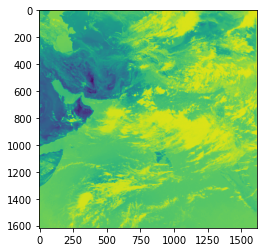

In [ ]:
# Displaying the blue band.

fig = plt.imshow(grey)
plt.show()


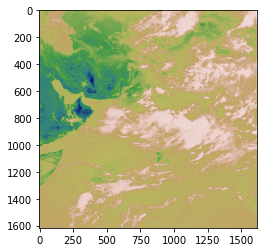

In [ ]:
# Displaying the green band.

fig = plt.imshow(grey)
fig.set_cmap('gist_earth')
plt.show()

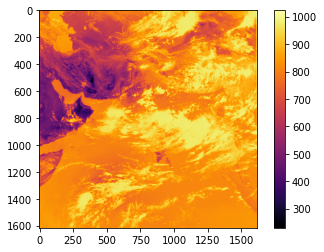

In [ ]:
# Displaying the red band.

fig = plt.imshow(grey)
fig.set_cmap('inferno')
plt.colorbar()
plt.show()

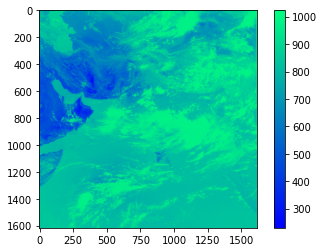

In [ ]:
# Displaying the infrared band.

fig = plt.imshow(grey)
fig.set_cmap('winter')
plt.colorbar()
plt.show()

In [ ]:
def show(grey,cmp,t):
  fig = plt.imshow(grey)
  fig.set_cmap(cmp)
  plt.colorbar()
  plt.title(t)
  plt.show()

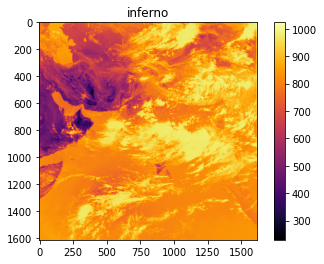

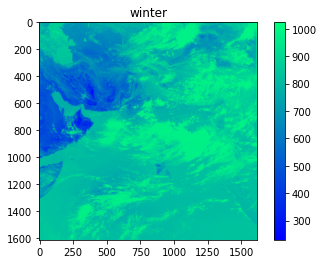

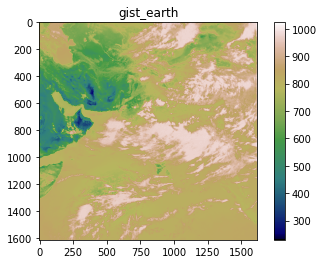

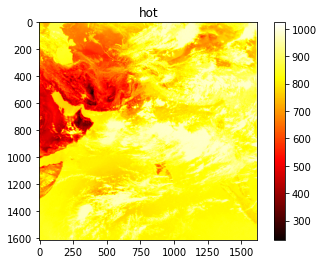

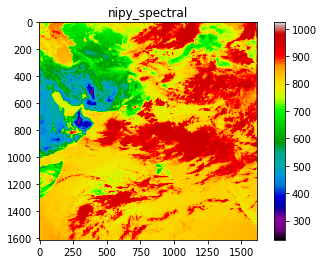

In [ ]:
cmp = ['inferno', 'winter', 'gist_earth','hot', 'nipy_spectral']

for map in cmp:
  show(grey,map,map)

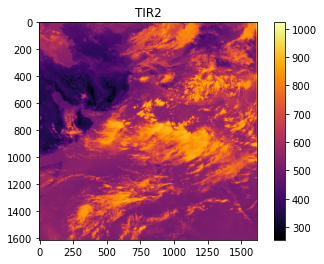

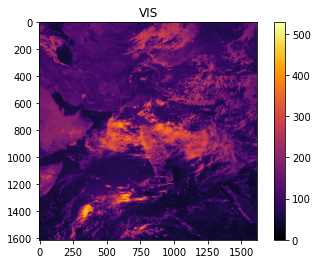

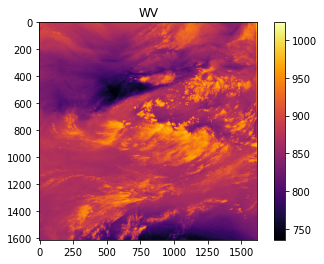

In [ ]:
i = 0
for sat_data in sat_datum:
  gray = sat_data.read(1)
  show(gray,'inferno', channels[i])
  i=i+1

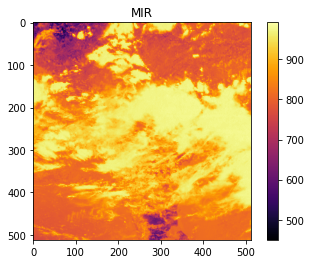

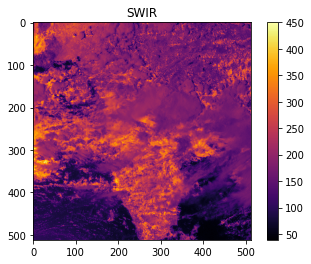

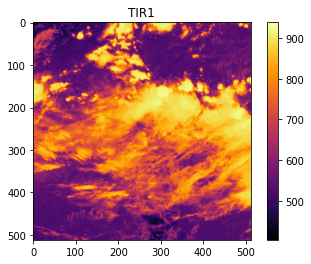

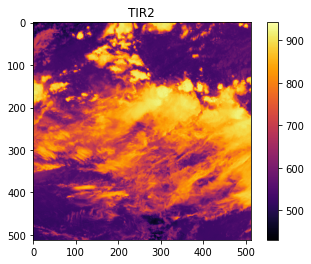

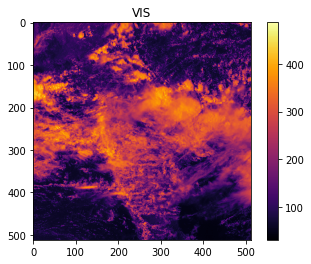

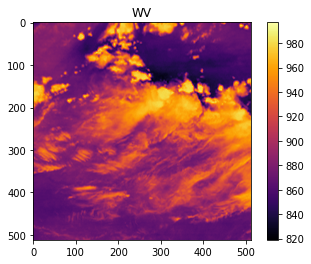

In [ ]:
from rasterio.windows import Window

import random

i = 0
for sat_data in sat_datum:
  x = random.randint(600,800)
  y = random.randint(600,700)
  gray = sat_data.read(1,window = Window(x,y,512,512))
  show(gray,'inferno', channels[i])
  i=i+1

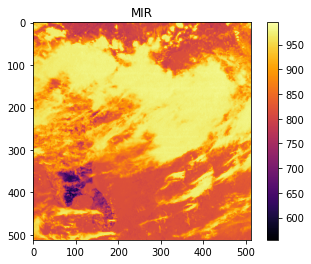

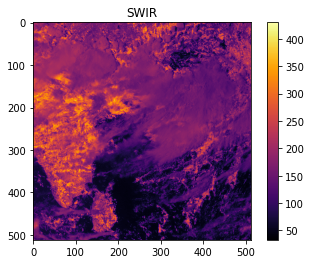

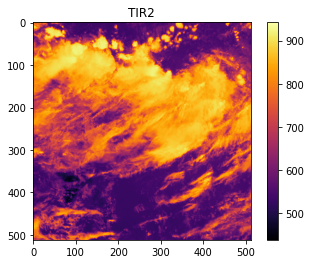

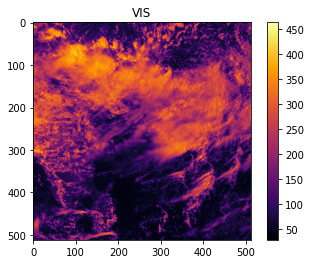

In [ ]:
from rasterio.windows import Window
i = 0
for sat_data in sat_datum:
  gray = sat_data.read(1,window = Window(800,700,512,512))
  show(gray,'inferno', channels[i])
  i=i+1

In [ ]:


def plot_and_save_image(gray_val, image_file, show = False, type = None):
    """
    False colours for matplotlib can be :
    1. inferno
    2. gist_earth
    3. winter
    """
    
    fig = plt.imshow(val)
    plt.colorbar()
    
    if type != None:
        fig.set_cmap('inferno')
    

    if show == True:
        plt.show()

    plt.savefig("pic.png")
    #Image.open(png).save(str(os.path.basename(image_file))[:-4]+'.jpg','JPEG')

In [ ]:
plot_and_save_image(grey, image_file)